# House Prices - Advanced Regression Techniques

## Table of content 
<ul>
    <li><a href="#Introduction">Introduction</a></li>
    <li><a href="#Dataset">Dataset</a></li>
    <li><a href="#Overview">Data Overview</a></li>
    <li><a href="#Cleaning">Data Cleaning</a></li>
    <li><a href="#Exploratory">Exploratory Data Analysis (EDA)</a></li>
    <li><a href="#Predictive">Predictive Modeling</a></li>
    <li><a href="#Conclusion">Conclusion</a></li>
</ul>

<a id='Introduction'></a>
## Introduction
This competition focuses on creative feature engineering and advanced regression techniques, such as random forests and gradient boosting. Your goal is to predict house prices accurately, with submissions evaluated using the Root-Mean-Squared-Error (RMSE) metric.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
train = pd.read_csv("DATA/train.csv")
test = pd.read_csv("DATA/test.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<a id='Overview'></a>
# Data Overview

In [3]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
len(test), len(train)

(1459, 1460)

In [5]:
df = pd.concat([train, test], axis=0)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [6]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [8]:
df.duplicated().sum()

0

In [9]:
null = df.isna().sum().sort_values(ascending=False).head(35)
null

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageQual       159
GarageCond       159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
BsmtFinSF1         1
BsmtFinSF2         1
SaleType           1
Electrical         1
GarageCars         1
TotalBsmtSF        1
GarageArea         1
Exterior2nd        1
Exterior1st        1
KitchenQual        1
BsmtUnfSF          1
dtype: int64

In [10]:
null_per = (null / len(df)) * 100 
null_per

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
SalePrice       49.982871
FireplaceQu     48.646797
LotFrontage     16.649538
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
GarageYrBlt      5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
Functional       0.068517
BsmtHalfBath     0.068517
BsmtFullBath     0.068517
Utilities        0.068517
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
SaleType         0.034258
Electrical       0.034258
GarageCars       0.034258
TotalBsmtSF      0.034258
GarageArea       0.034258
Exterior2nd      0.034258
Exterior1st      0.034258
KitchenQual      0.034258
BsmtUnfSF        0.034258
dtype: float64

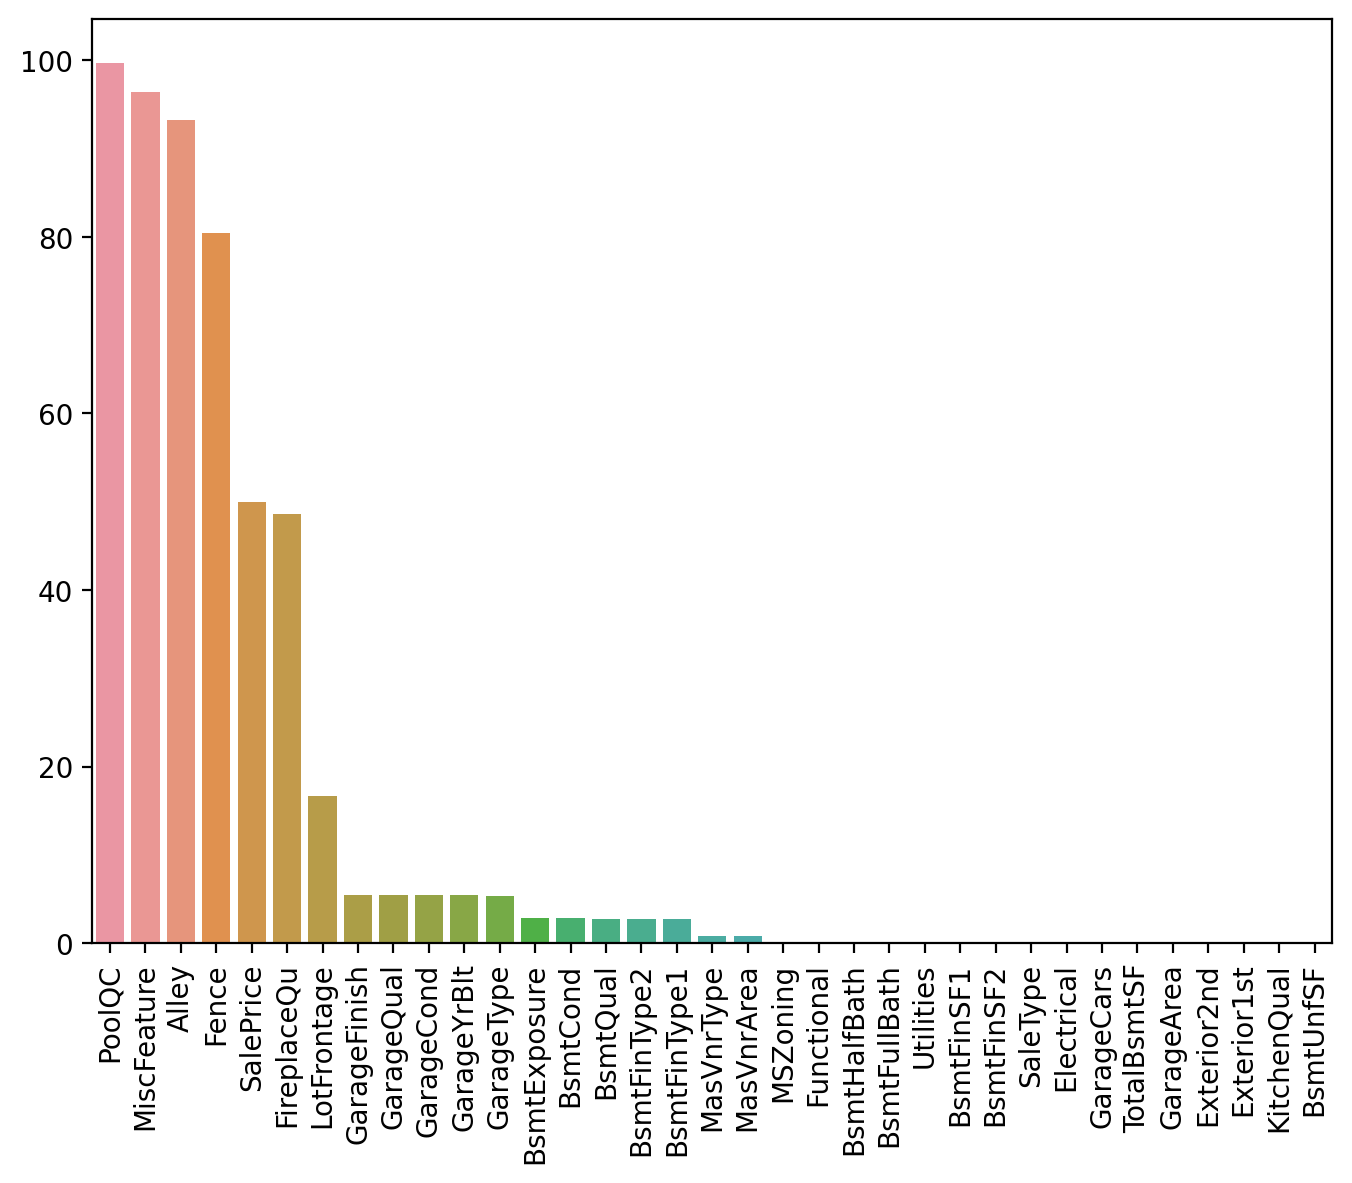

In [11]:
plt.figure(figsize=(8,6), dpi=200)
sns.barplot(x=null_per.index, y=null_per.values)
plt.xticks(rotation=90);

<a id='Cleaning'></a>
# Data Cleaning

In [12]:
df.loc[(df['MiscFeature'].notna()) & (df['Alley'].notna()) & (df['PoolQC'].notna())]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [13]:
df = df.drop(['MiscFeature', 'Alley', 'PoolQC'], axis=1)

In [14]:
df[df['Fence'].notna()].head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,Ex,Y,SBrkr,796,566,0,1362,1.0,0.0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,40,30,0,320,0,0,MnPrv,700,10,2009,WD,Normal,143000.0
14,15,20,RL,NaN,10920,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733.0,Unf,0.0,520.0,1253.0,GasA,TA,Y,SBrkr,1253,0,0,1253,1.0,0.0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1.0,352.0,TA,TA,Y,0,213,176,0,0,0,GdWo,0,5,2008,WD,Normal,157000.0
15,16,45,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,7,8,1929,2001,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,832.0,832.0,GasA,Ex,Y,FuseA,854,0,0,854,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1991.0,Unf,2.0,576.0,TA,TA,Y,48,112,0,0,0,0,GdPrv,0,7,2007,WD,Normal,132000.0
19,20,20,RL,70.0,7560,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1958,1965,Hip,CompShg,BrkFace,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,504.0,Unf,0.0,525.0,1029.0,GasA,TA,Y,SBrkr,1339,0,0,1339,0.0,0.0,1,0,3,1,TA,6,Min1,0,NaN,Attchd,1958.0,Unf,1.0,294.0,TA,TA,Y,0,0,0,0,0,0,MnPrv,0,5,2009,COD,Abnorml,139000.0
21,22,45,RM,57.0,7449,Pave,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Unf,7,7,1930,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0.0,Unf,0.0,637.0,637.0,GasA,Ex,Y,FuseF,1108,0,0,1108,0.0,0.0,1,0,3,1,Gd,6,Typ,1,Gd,Attchd,1930.0,Unf,1.0,280.0,TA,TA,N,0,0,205,0,0,0,GdPrv,0,6,2007,WD,Normal,139400.0
24,25,20,RL,NaN,8246,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188.0,ALQ,668.0,204.0,1060.0,GasA,Ex,Y,SBrkr,1060,0,0,1060,1.0,0.0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1.0,270.0,TA,TA,Y,406,90,0,0,0,0,MnPrv,0,5,2010,WD,Normal,154000.0
30,31,70,C (all),50.0,8500,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,649.0,649.0,GasA,TA,N,SBrkr,649,668,0,1317,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1920.0,Unf,1.0,250.0,TA,Fa,N,0,54,172,0,0,0,MnPrv,0,7,2008,WD,Normal,40000.0
31,32,20,RL,NaN,8544,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1966,2006,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1228.0,1228.0,GasA,Gd,Y,SBrkr,1228,0,0,1228,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1966.0,Unf,1.0,271.0,TA,TA,Y,0,65,0,0,0,0,MnPrv,0,6,2008,WD,Normal,149350.0
40,41,20,RL,84.0,8658,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1965,1965,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,101.0,TA,TA,CBlock,TA,TA,No,Rec,643.0,Unf,0.0,445.0,1088.0,GasA,Ex,Y,SBrkr,1324,0,0,1324,0.0,0.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1965.0,RFn,2.0,440.0,TA,TA,Y,0,138,0,0,0,0,GdWo,0,12,2006,WD,Abnorml,160000.0
42,43,85,RL,NaN,9180,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,SFoyer,5,7,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,ALQ,747.0,L

In [15]:
df = df.drop('Fence', axis=1)

In [16]:
df[df['FireplaceQu'].notna()].head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,0.0,317.0,1686.0,GasA,Ex,Y,SBrkr,1694,0,0,1694,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2.0,636.0,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000.0
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Gd,Y,FuseF,1022,752,0,1774,0.0,0.0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2.0,468.0,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851.0,Unf,0.0,140.0,991.0,GasA,Ex,Y,SBrkr,1077,0,0,1077,1.0,0.0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1.0,205.0,Gd,TA,Y,0,4,0,0,0,0,0,1,2008,WD,Normal,118000.0
11,12,60,RL,85.0,11924,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,WdShing,Wd Shng,Stone,286.0,Ex,TA,PConc,Ex,TA,No,GLQ,998.0,Unf,0.0,177.0,1175.0,GasA,Ex,Y,SBrkr,1182,1142,0,2324,1.0,0.0,3,0,4,1,Ex,11,Typ,2,Gd,BuiltIn,2005.0,Fin,3.0,736.0,TA,TA,Y,147,21,0,0,0,0,0,7,2006,New,Partial,345000.0
13,14,20,RL,91.0,10652,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,Stone,306.0,Gd,TA,PConc,Gd,TA,Av,Unf,0.0,Unf,0.0,1494.0,1494.0,GasA,Ex,Y,S

In [17]:
df['FireplaceQu'].fillna('Missing', inplace=True)

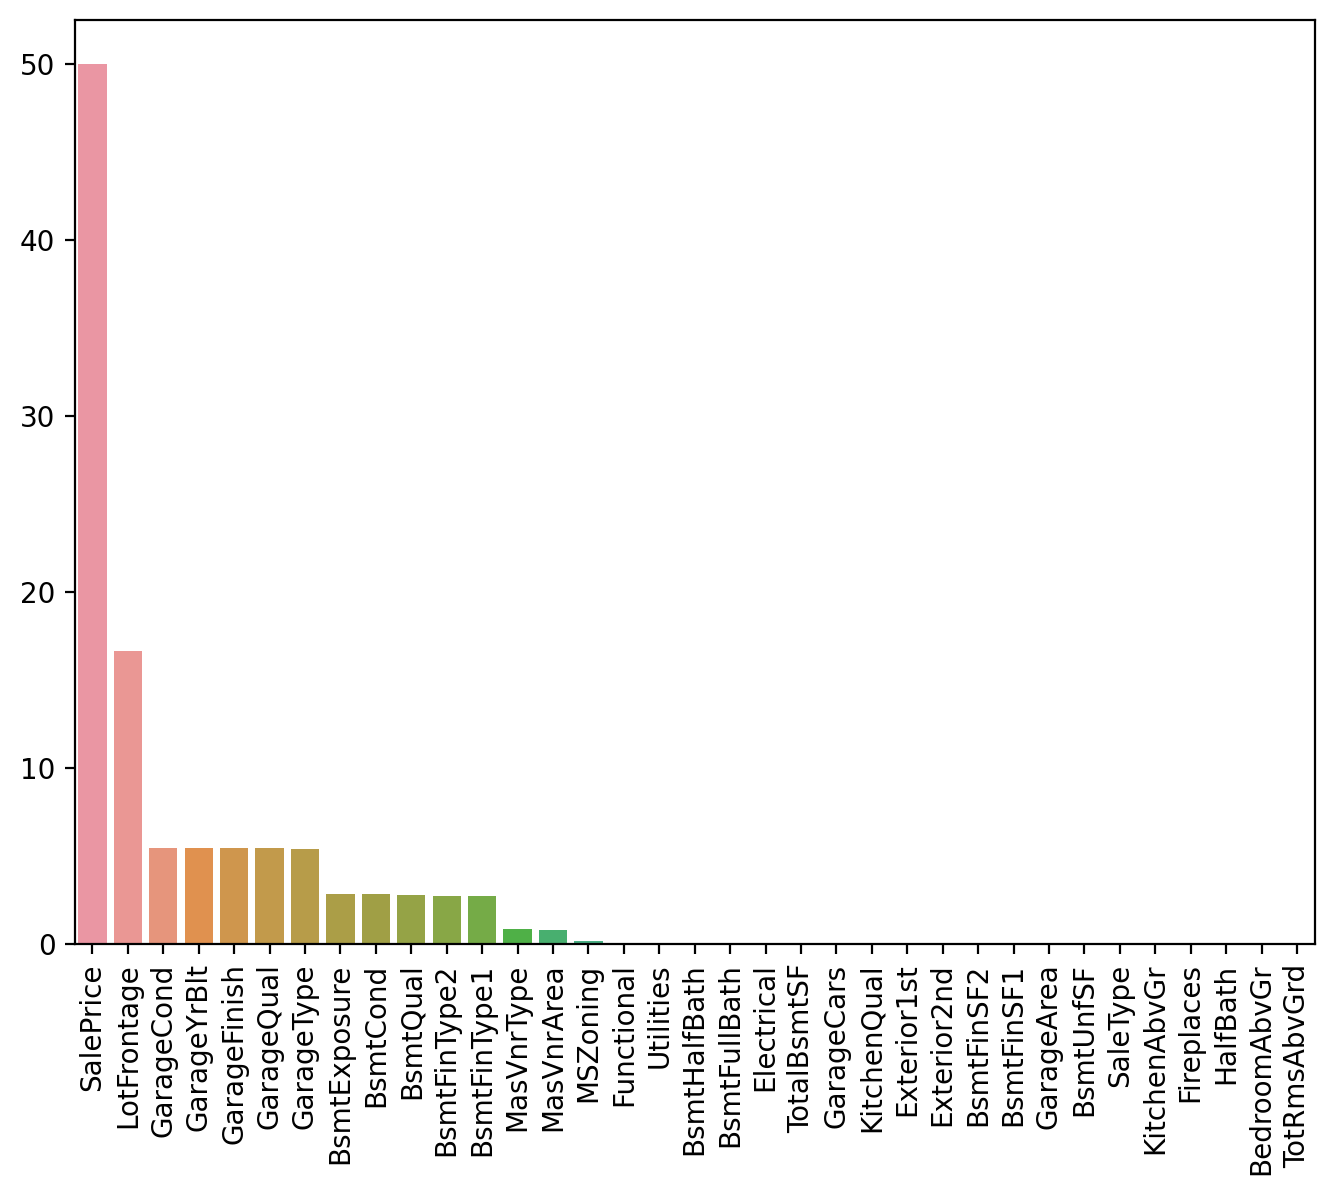

In [18]:
null = df.isna().sum().sort_values(ascending=False).head(35)
null_per = (null / len(df)) * 100 

plt.figure(figsize=(8,6), dpi=200)
sns.barplot(x=null_per.index, y=null_per.values)
plt.xticks(rotation=90);

In [19]:
df = df.drop(['MSZoning', 'Functional', 'BsmtHalfBath', 'BsmtFullBath', 'Utilities', 'BsmtFinSF1', 'BsmtFinSF2', 'SaleType', 'Electrical', 'GarageCars', 'TotalBsmtSF', 'GarageArea', 'Exterior2nd', 'Exterior1st', 'KitchenQual', 'BsmtUnfSF'], axis=1)

In [20]:
mean = df['LotFrontage'].mean()
df['LotFrontage'].fillna(mean, inplace=True)

In [21]:
df.isna().sum().sort_values(ascending=False).head(13)

SalePrice       1459
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
dtype: int64

In [22]:
df['GarageCond'].fillna('Missing', inplace=True)

In [23]:
df.isna().sum().sort_values(ascending=False).head(13)

SalePrice       1459
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MiscVal            0
dtype: int64

In [24]:
df['GarageQual'].fillna('Missing', inplace=True)

In [25]:
df['GarageFinish'].fillna('Missing', inplace=True)
df['GarageType'].fillna('Missing', inplace=True)
df['GarageYrBlt'].fillna('Missing', inplace=True)

In [26]:
df[df['BsmtExposure'].isna()].head(15)

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
17,18,90,72.000000,10791,Pave,Reg,Lvl,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,1296,0,0,1296,2,0,2,2,6,0,Missing,CarPort,1967.0,Unf,TA,TA,Y,0,0,0,0,0,0,500,10,2006,Normal,90000.0
39,40,90,65.000000,6040,Pave,Reg,Lvl,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,GasA,TA,N,1152,0,0,1152,2,0,2,2,6,0,Missing,Missing,Missing,Missing,Missing,Missing,N,0,0,0,0,0,0,0,6,2008,AdjLand,82000.0
90,91,20,60.000000,7200,Pave,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,1040,0,0,1040,1,0,2,1,4,0,Missing,Detchd,1950.0,Unf,TA,TA,Y,0,29,0,0,0,0,0,7,2006,Normal,109900.0
102,103,90,64.000000,7018,Pave,Reg,Bnk,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,None,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,1535,0,0,1535,2,0,4,2,8,0,Missing,Attchd,1979.0,Unf,TA,TA,Y,0,0,0,0,0,0,0,6,2009,Alloca,118964.0
156,157,20,60.000000,7200,Pave,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,1040,0,0,1040,1,0,2,1,5,0,Missing,Detchd,1950.0,Unf,TA,TA,Y,0,0,0,0,0,0,0,6,2006,Normal,109500.0
182,183,20,60.000000,9060,Pave,Reg,Lvl,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,BrkFace,98.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,GasA,Ex,Y,1340,0,0,1340,1,0,3,1,7,1,Gd,Attchd,1957.0,RFn,TA,TA,Y,116,0,0,180,0,0,0,6,2007,Normal,120000.0
259,260,20,70.000000,12702,Pave,Reg,Lvl,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,GasA,Gd,Y,882,0,0,882,1,0,2,1,4,0,Missing,Detchd,1956.0,Unf,TA,TA,Y,0,45,0,0,0,0,0,12,2008,Normal,97000.0
342,343,90,69.305795,8544,Pave,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,BrkFace,340.0,TA,TA,Slab,NaN,NaN,NaN,NaN,NaN,Wall,Fa,N,1040,0,0,1040,2,0,2,2,6,0,Missing,Detchd,1949.0,Unf,TA,TA,Y,0,0,0,0,0,0,0,5,2006,Normal,87500.0
362,363,85,64.000000,7301,Pave,Reg,Lvl,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,NaN,GasA,Ex,Y,495,1427,0,1922,3,0,4,1,7,1,Ex,BuiltIn,2003.0,RFn,TA,TA,Y,0,0,177,0,0,0,0,7,2009,Normal,198500.0
371,372,50,80.000000,17120,Pave,Reg,Lvl,Inside,Gtl,ClearCr,Feedr,Norm,1Fam,1.5Fin,4,4,1959,1959,Gable,CompShg,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,1120,468,0,1588,2,0,4,1,7,1,Gd,Detchd,1991.0,Fin,TA,TA,N,0,59,0,0,0,0,0,7,2008,Normal,134432.0


In [27]:
df['BsmtExposure'].fillna('Missing', inplace=True)
df['BsmtCond'].fillna('Missing', inplace=True)
df['BsmtQual'].fillna('Missing', inplace=True)
df['BsmtFinType2'].fillna('Missing', inplace=True)
df['BsmtFinType1'].fillna('Missing', inplace=True)

df[df['MasVnrArea'].isna()]

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
234,235,60,69.305795,7851,Pave,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,860,1100,0,1960,2,1,4,1,8,2,TA,BuiltIn,2002.0,Fin,TA,TA,Y,288,48,0,0,0,0,0,5,2010,Normal,216500.0
529,530,20,69.305795,32668,Pave,IR1,Lvl,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,Unf,GasA,TA,Y,2515,0,0,2515,3,0,4,2,9,2,TA,Attchd,1975.0,RFn,TA,TA,Y,0,0,200,0,0,0,0,3,2007,Alloca,200624.0
650,651,60,65.000000,8125,Pave,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,822,843,0,1665,2,1,3,1,7,0,Missing,Attchd,2007.0,RFn,TA,TA,Y,0,0,0,0,0,0,0,5,2008,Normal,205950.0
936,937,20,67.000000,10083,Pave,Reg,Lvl,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,1200,0,0,1200,2,0,2,1,5,0,Missing,Attchd,2003.0,RFn,TA,TA,Y,0,41,0,0,0,0,0,8,2009,Normal,184900.0
973,974,20,95.000000,11639,Pave,Reg,Lvl,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,1428,0,0,1428,2,0,3,1,6,0,Missing,Attchd,2007.0,Fin,TA,TA,Y,0,120,0,0,0,0,0,12,2008,Partial,182000.0
977,978,120,35.000000,4274,Pave,IR1,Lvl,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,1241,0,0,1241,1,1,1,1,4,0,Missing,Attchd,2007.0,Fin,TA,TA,Y,0,116,0,0,0,0,0,11,2007,Partial,199900.0
1243,1244,20,107.000000,13891,Pave,Reg,Lvl,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,Unf,GasA,Ex,Y,2076,0,0,2076,2,1,2,1,7,1,Gd,Attchd,2006.0,Fin,TA,TA,Y,216,229,0,0,0,0,0,9,2006,Partial,465000.0
1278,1279,60,75.000000,9473,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,1128,903,0,2031,2,1,3,1,7,1,Gd,Attchd,2002.0,RFn,TA,TA,Y,0,211,0,0,0,0,0,3,2008,Normal,237000.0
231,1692,60,69.305795,12891,Pave,IR1,Lvl,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,Unf,GasA,Ex,Y,878,1126,0,2004,2,1,4,1,8,1,Gd,BuiltIn,2002.0,Fin,TA,TA,Y,0,48,0,0,0,0,0,7,2009,Normal,NaN
246,1707,20,90.000000,7993,Pave,IR1,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,Unf,GasA,Ex,Y,1436,0,0,1436,2,0,3,1,6,0,Missing,Attchd,2008.0,Fin,TA,TA,Y,0,121,0,0,0,0,0,10,2009,Partial,NaN


In [28]:
df['MasVnrType'].fillna('Missing', inplace=True)
df['MasVnrArea'].fillna('Missing', inplace=True)

In [29]:
df.isna().sum()

Id                  0
MSSubClass          0
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinType2        0
Heating             0
HeatingQC           0
CentralAir          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
FireplaceQu         0
GarageType          0
GarageYrBl

<a id='Exploratory'></a>
# Exploratory Data Analysis (EDA)

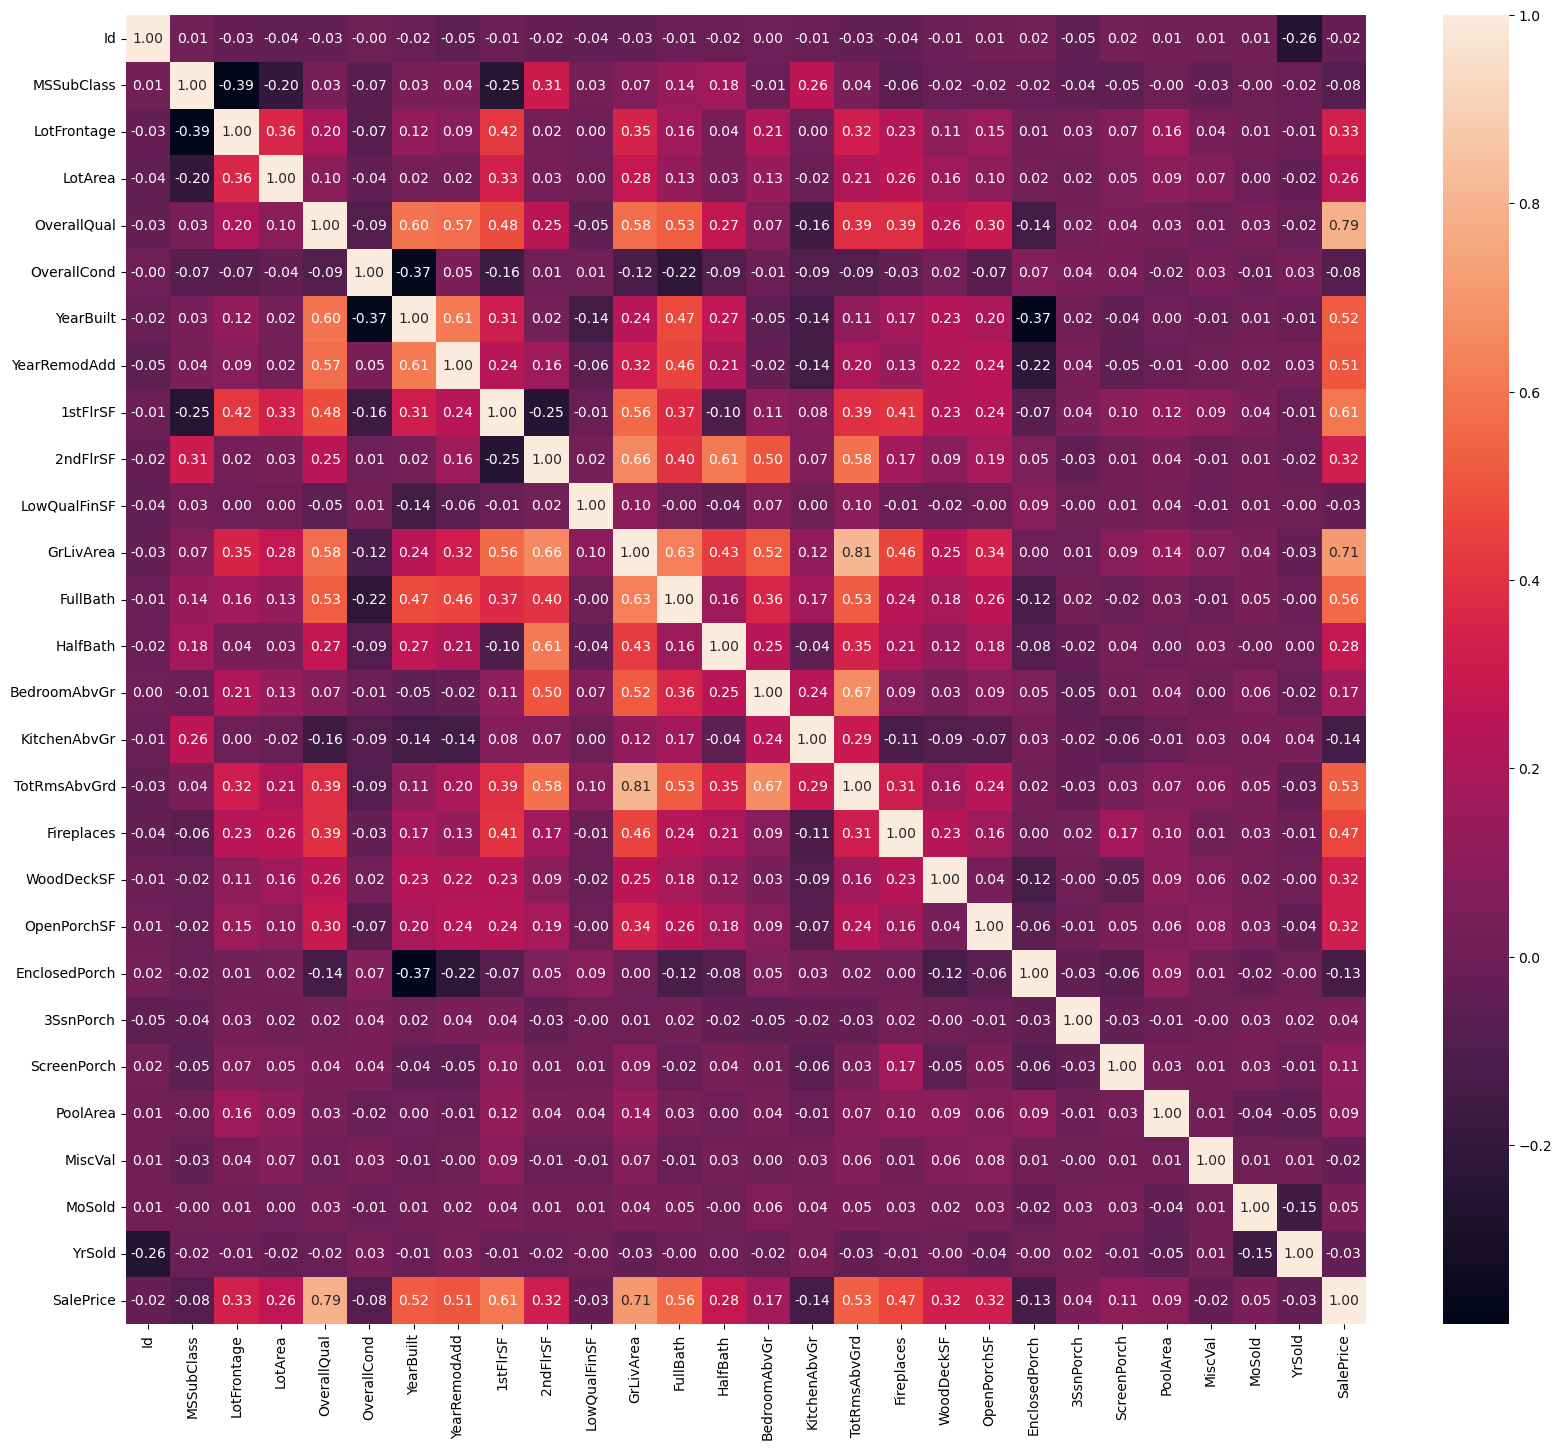

In [30]:
f, ax = plt.subplots(figsize=(20, 17))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f');

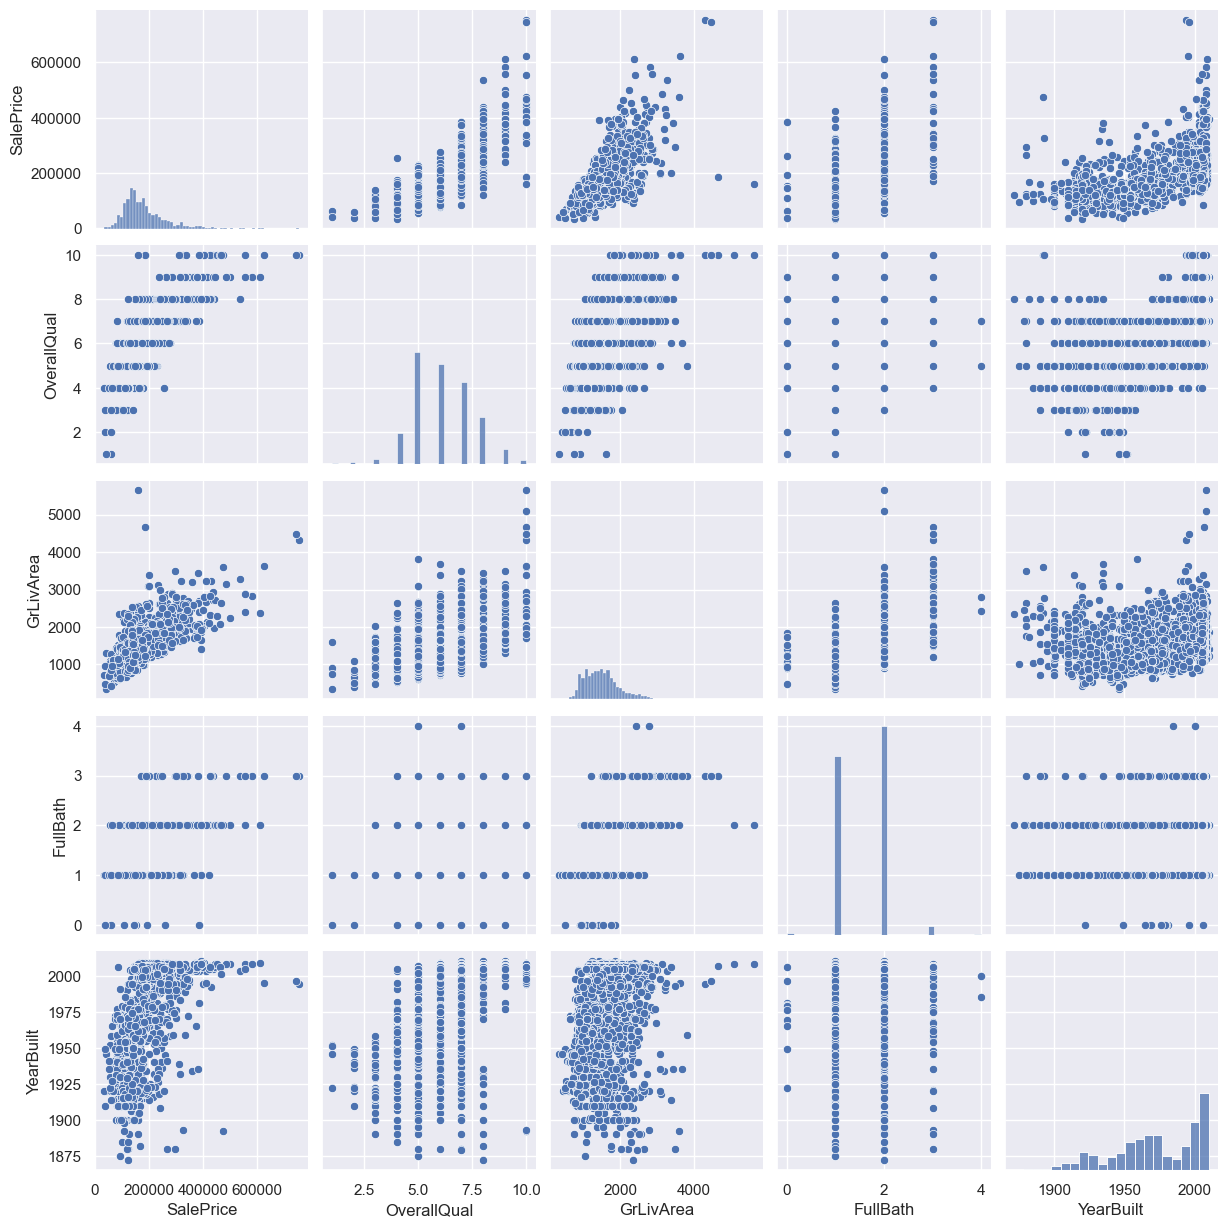

In [31]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols])
plt.show();

<a id='Predictive'></a>
# Predictive Modeling

In [32]:
categorical_data = [col for col in df.columns if df[col].dtype == 'object']

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for column in categorical_data:
    df[column] = encoder.fit_transform(df[column].astype(str))

In [33]:
train_df = df[:len(train)]
test_df = df[len(test) + 1:]

In [34]:
len(train_df), len(train)

(1460, 1460)

In [35]:
len(test_df), len(test)

(1459, 1459)

In [36]:
X = train_df.drop(['SalePrice', 'Id'], axis=1)
y = train_df['SalePrice']

test_sample = test_df.drop(['SalePrice', 'Id'], axis=1)

In [37]:
X.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,60,65.0,8450,1,3,3,4,0,5,2,2,0,5,7,5,2003,2003,1,1,1,99,2,4,2,2,4,4,2,6,1,0,1,856,854,0,1710,2,1,3,1,8,0,3,1,94,2,5,5,2,0,61,0,0,0,0,0,2,2008,4
1,20,80.0,9600,1,3,3,2,0,24,1,2,0,2,6,8,1976,1976,1,1,3,0,3,4,1,2,4,1,0,6,1,0,1,1262,0,0,1262,2,0,3,1,6,1,5,1,67,2,5,5,2,298,0,0,0,0,0,0,5,2007,4
2,60,68.0,11250,1,0,3,4,0,5,2,2,0,5,7,5,2001,2002,1,1,1,70,2,4,2,2,4,3,2,6,1,0,1,920,866,0,1786,2,1,3,1,6,1,5,1,92,2,5,5,2,0,42,0,0,0,0,0,9,2008,4
3,70,60.0,9550,1,0,3,0,0,6,2,2,0,5,7,5,1915,1970,1,1,3,0,3,4,0,4,1,4,0,6,1,2,1,961,756,0,1717,1,0,3,1,7,1,2,5,89,3,5,5,2,0,35,272,0,0,0,0,2,2006,0
4,60,84.0,14260,1,0,3,2,0,15,2,2,0,5,8,5,2000,2000,1,1,1,228,2,4,2,2,4,0,2,6,1,0,1,1145,1053,0,2198,2,1,4,1,9,1,5,1,91,2,5,5,2,192,84,0,0,0,0,0,12,2008,4


In [38]:
y.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
linear_model = LinearRegression()

In [45]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [46]:
pred = linear_model.predict(X_test)

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [48]:
MAE_linear = mean_absolute_error(y_test, pred)
MSE_linear = mean_squared_error(y_test, pred)
RMSE_linear = np.sqrt(MSE_linear)
R2_linear = r2_score(y_test, pred)

print(f"MAE: {MAE_linear}")
print(f"MSE: {MSE_linear}")
print(f"RMSE: {RMSE_linear}")
print(f"R2: {R2_linear}")

MAE: 22600.714212692823
MSE: 1829481801.118257
RMSE: 42772.44207569001
R2: 0.7092753164345191


In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
n_est = [50,100,150,200]

for n in n_est:
    rf = RandomForestRegressor(n_estimators=n, oob_score=True, random_state=101)
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    MAE = mean_absolute_error(y_test, pred)
    print(f"n_est: {n}, OOB: {rf.oob_score_}, MAE: {MAE}")

n_est: 50, OOB: 0.8405169860221018, MAE: 19934.939406392696
n_est: 100, OOB: 0.8487300882956302, MAE: 19530.956141552513
n_est: 150, OOB: 0.8502014901447424, MAE: 19450.060654490106
n_est: 200, OOB: 0.8486874671798758, MAE: 19531.56079908676


In [51]:
rf_model = RandomForestRegressor(n_estimators=150, random_state=101)

In [52]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150, random_state=101)

In [53]:
pred = rf_model.predict(X_test)

In [54]:
MAE_rf = mean_absolute_error(y_test, pred)
MSE_rf = mean_squared_error(y_test, pred)
RMSE_rf = np.sqrt(MSE_rf)
R2_rf = r2_score(y_test, pred)

print(f"MAE: {MAE_rf}")
print(f"MSE: {MSE_rf}")
print(f"RMSE: {RMSE_rf}")
print(f"R2: {R2_rf}")

MAE: 19450.060654490106
MSE: 1052137944.5795645
RMSE: 32436.675917540695
R2: 0.8328037639848831


In [55]:
from sklearn.svm import SVR

In [56]:
svr_model = SVR(kernel='rbf')

In [57]:
svr_model.fit(X_train, y_train)

SVR()

In [58]:
pred = svr_model.predict(X_test)

In [59]:
MAE_svr = mean_absolute_error(y_test, pred)
MSE_svr = mean_squared_error(y_test, pred)
RMSE_svr = np.sqrt(MSE_svr)
R2_svr = r2_score(y_test, pred)

print(f"MAE: {MAE_svr}")
print(f"MSE: {MSE_svr}")
print(f"RMSE: {RMSE_svr}")
print(f"R2: {R2_svr}")

MAE: 54949.95418034759
MSE: 6514310966.056336
RMSE: 80711.2815290176
R2: -0.03519531765566364


In [60]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [61]:
xg = XGBRegressor(objective='reg:squarederror', random_state=101)

In [62]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.3, 0.6, 0.7, 0.8, 1.0]
}

In [63]:
grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error')

In [64]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=101, ...),
             param_grid={'colsample_bytree': [0.3, 0.6, 0.7, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150, 200],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='neg_mean_absolute_error')

In [65]:
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.6}


In [66]:
xg_model = XGBRegressor(**best_params, objective='reg:squarederror', random_state=101)

In [67]:
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=101, ...)

In [68]:
pred = xg_model.predict(X_test)

In [69]:
MAE_xg = mean_absolute_error(y_test, pred)
MSE_xg = mean_squared_error(y_test, pred)
RMSE_xg = np.sqrt(MSE_xg)
R2_xg = r2_score(y_test, pred)

print(f"MAE: {MAE_xg}")
print(f"MSE: {MSE_xg}")
print(f"RMSE: {RMSE_xg}")
print(f"R2: {R2_xg}")

MAE: 17275.213479238013
MSE: 732561707.4630681
RMSE: 27065.87717889572
R2: 0.8835879261197296


<Axes: >

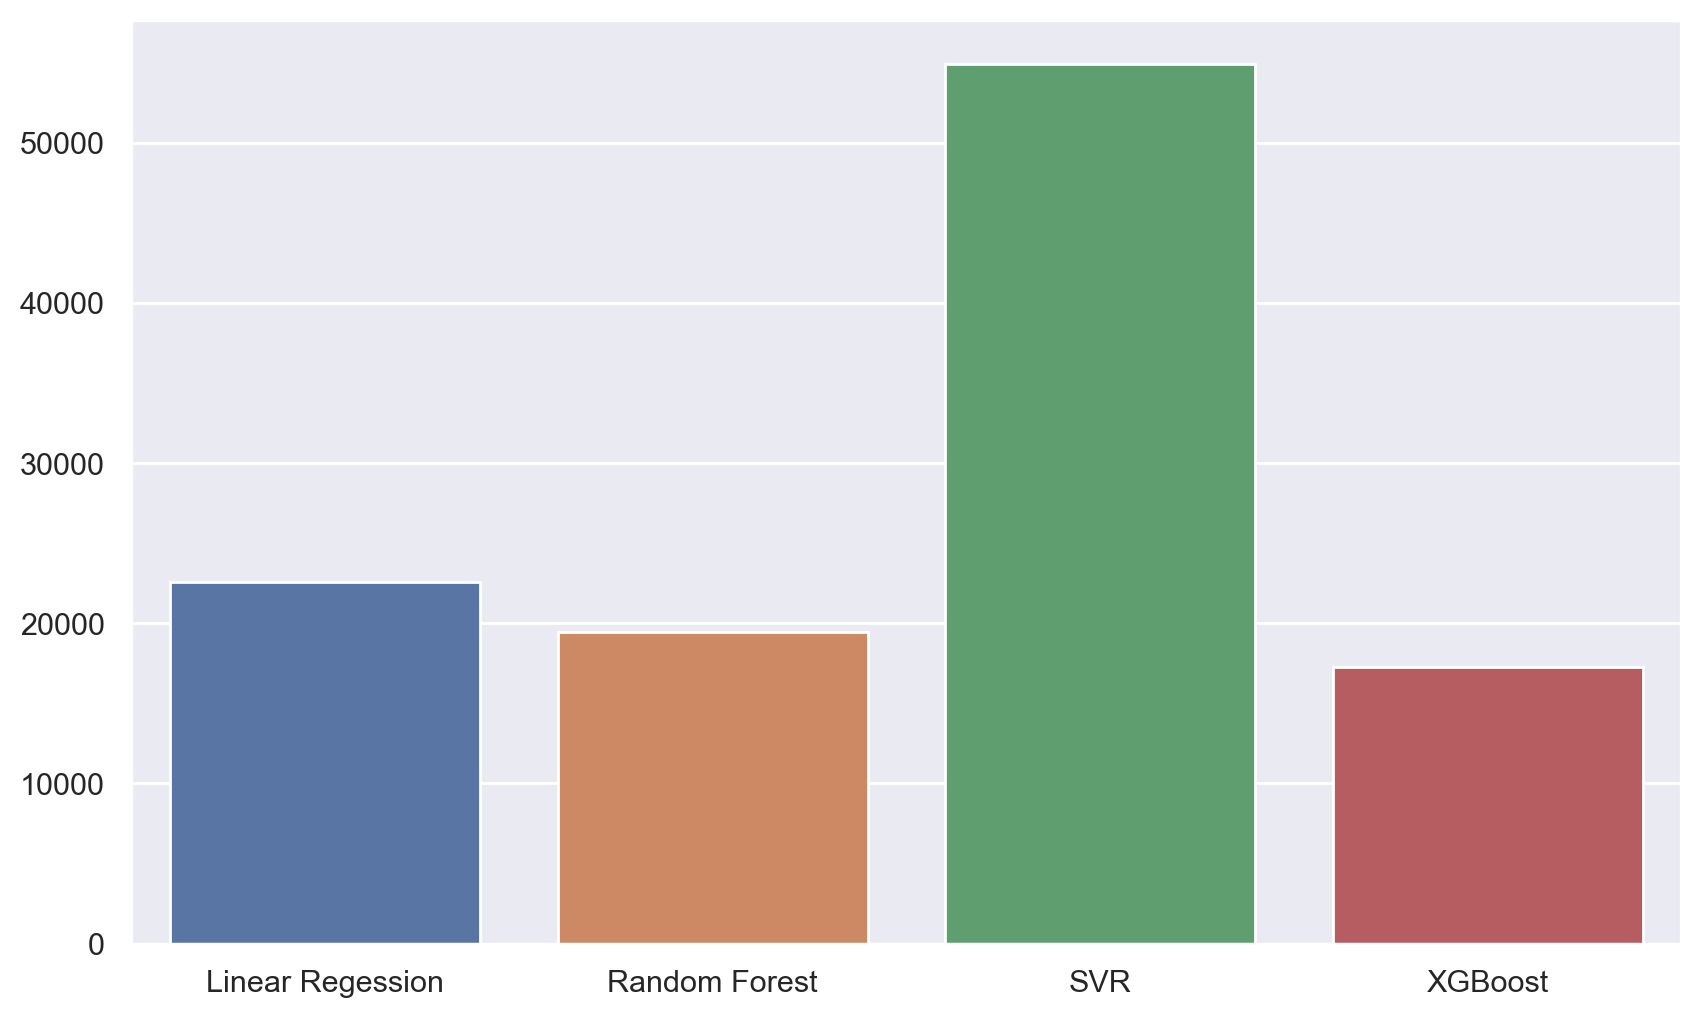

In [70]:
plt.figure(figsize=(10,6), dpi=200)
sns.barplot(x=['Linear Regession', 'Random Forest', 'SVR', 'XGBoost'], y=[MAE_linear, MAE_rf, MAE_svr, MAE_xg])

In [71]:
scaler = MinMaxScaler()
test_sample = scaler.fit_transform(test_sample)

In [72]:
y_pred = xg_model.predict(test_sample)

In [73]:
submit = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': y_pred
})

In [74]:
submit

,Id,SalePrice
0,1461,132548.703125
1,1462,171723.640625
2,1463,166098.234375
3,1464,193866.281250
4,1465,218764.125000
5,1466,176330.203125
6,1467,160829.000000
7,1468,170100.000000
8,1469,192918.156250
9,1470,126081.976562


In [75]:
submit.to_csv("DATA/submission.csv", index=False)